# Python Data Visualization

In [33]:
# First, we'll import liberaries , a data processing and CSV file 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# current version of seaborn generates a bunch of warnings that we'll ignore
import warnings
warnings.filterwarnings("ignore")

#sns.set(style="dark", color_codes=True)

In [3]:
df=pd.read_csv("C:\data\Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe(include ='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Let's see how many examples we have of each species

In [9]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### The first way we can plot things is using the .plot extension from Pandas dataframes
#### We'll use this to make a scatterplot of the Iris features.


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

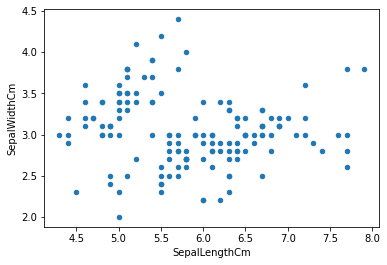

In [11]:
df.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

### We can also use the seaborn library to make a similar plot
#### A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure


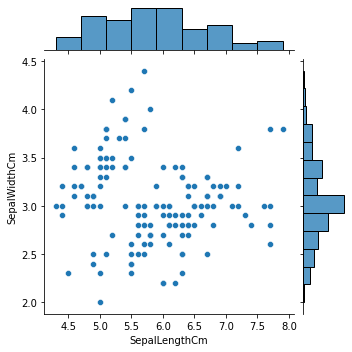

In [17]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, size=5)

### One piece of information missing in the plots above is what species each plant is
#### We'll use seaborn's FacetGrid to color the scatterplot by species


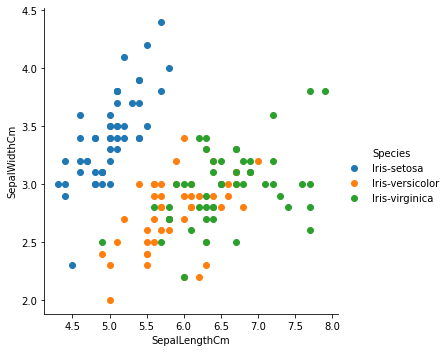

In [18]:
sns.FacetGrid(df, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

### We can look at an individual feature in Seaborn through a boxplot


<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

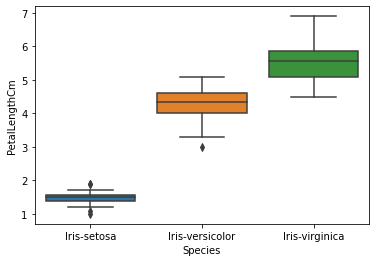

In [19]:
sns.boxplot(x="Species", y="PetalLengthCm", data=df)

### One way we can extend this plot is adding a layer of individual points on top of it through Seaborn's striplot
#### We'll use jitter=True so that all the points don't fall in single vertical lines
#### Saving the resulting axes as ax each time causes the resulting plot to be shown



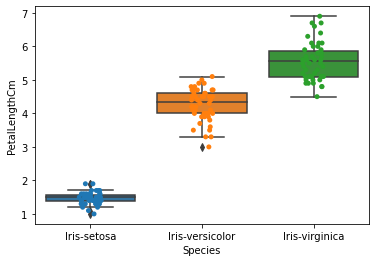

In [20]:
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=df)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=df, jitter=True, edgecolor="gray")

### A violin plot combines the benefits of the previous two plots and simplifies them
#### Denser regions of the data are fatter, and sparser thiner in a violin plot


<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

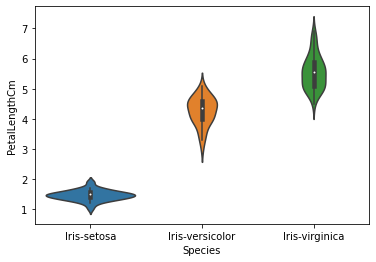

In [22]:
sns.violinplot(x="Species", y="PetalLengthCm", data=df, size=6)

### A final seaborn plot useful for looking at univariate relations is the kdeplot,
#### which creates and visualizes a kernel density estimate of the underlying feature


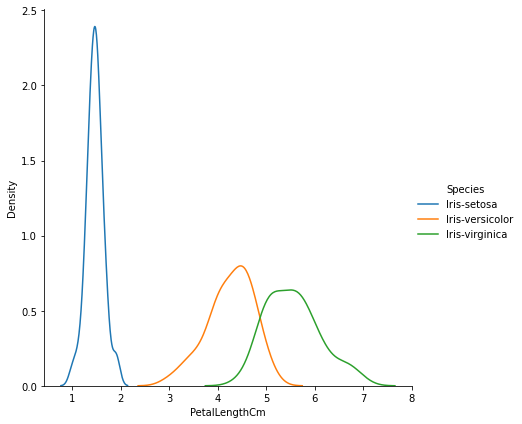

In [23]:
sns.FacetGrid(df, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

### Another useful seaborn plot is the pairplot, which shows the bivariate relation
#### between each pair of features
#### From the pairplot, we'll see that the Iris-setosa species is separataed from the other



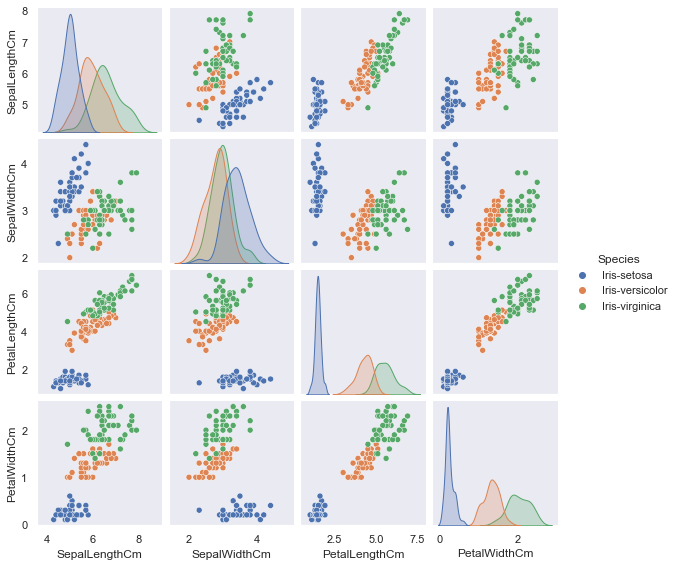

In [34]:
sns.pairplot(df.drop("Id", axis=1), hue="Species", size=2)

### The diagonal elements in a pairplot show the histogram by default
#### We can update these elements to show other things, such as a kde


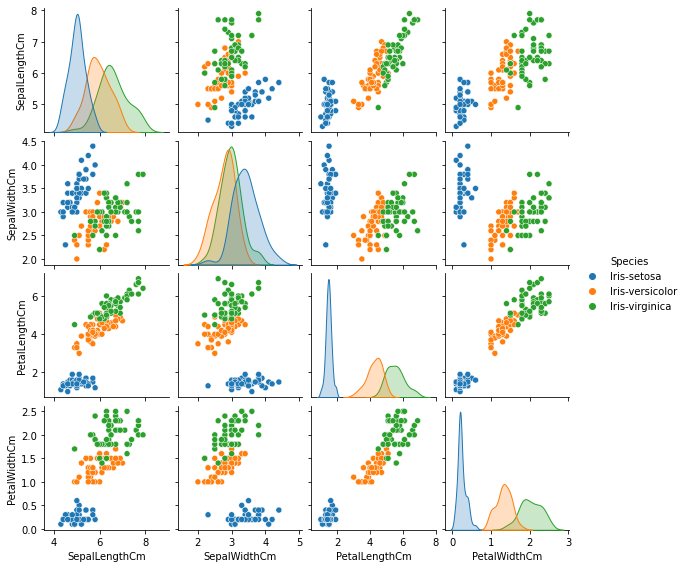

In [26]:
sns.pairplot(df.drop("Id", axis=1), hue="Species", size=2, diag_kind="kde")

### Now that we've covered seaborn, let's go back to some of the ones we can make with Pandas
#### We can quickly make a boxplot with Pandas on each feature split out by species


array([[<AxesSubplot:title={'center':'PetalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'SepalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

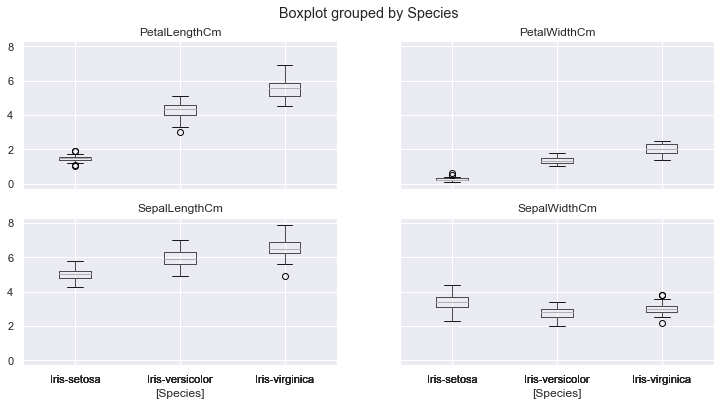

In [35]:
df.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))

### One cool more sophisticated technique pandas has available is called Andrews Curves
#### Andrews Curves involve using attributes of samples as coefficients for Fourier series , and then plotting these


<AxesSubplot:>

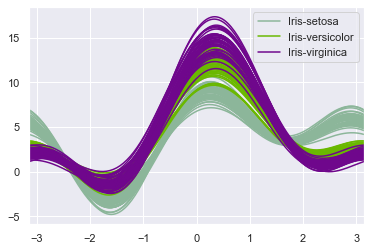

In [38]:
from pandas.plotting import andrews_curves
andrews_curves(df.drop("Id", axis=1), "Species")

### Another multivariate visualization technique pandas has is parallel_coordinates
#### Parallel coordinates plots each feature on a separate column & then draws lines
#### connecting the features for each data sample


<AxesSubplot:>

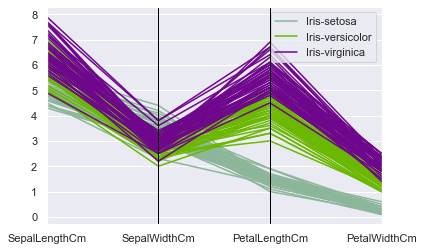

In [40]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(df.drop("Id", axis=1), "Species")

### A final multivariate visualization technique pandas has is radviz
#### Which puts each feature as a point on a 2D plane, and then simulates
#### having each sample attached to those points through a spring weighted
#### by the relative value for that feature


<AxesSubplot:>

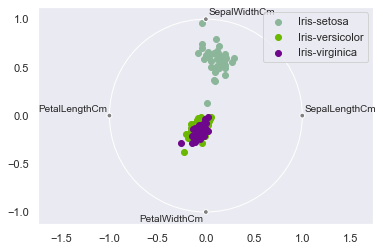

In [41]:
from pandas.plotting import radviz
radviz(df.drop("Id", axis=1), "Species")